In [43]:
# !pip install pymongo
# !pip install folium
# !pip install xlrd

In [44]:
import folium
import webbrowser
from folium.plugins import HeatMap
import xlrd

import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pymongo import MongoClient

In [45]:
geo_file = open('geoLondonJan', 'r', encoding='utf-8')
data = []
for line in geo_file.readlines():
    el = json.loads(line)
    data.append(el)

data = pd.DataFrame(list(data))
print(data)

                      _id                               date         username  \
0     1486425030581968898  {'$date': '2022-01-26T19:45:18Z'}     RichartinFan   
1     1486425474335076352  {'$date': '2022-01-26T19:47:04Z'}   CelebFitnessTV   
2     1486427410434301952  {'$date': '2022-01-26T19:54:45Z'}         DJAgroUK   
3     1486427833899655169  {'$date': '2022-01-26T19:56:26Z'}         komabs16   
4     1486429309019566086  {'$date': '2022-01-26T20:02:18Z'}       Flip_Calvi   
...                   ...                                ...              ...   
4137  1488781350845005827  {'$date': '2022-02-02T07:48:28Z'}  wildeoneslondon   
4138  1488781369887105028  {'$date': '2022-02-02T07:48:33Z'}  foodship_evelyn   
4139  1488781997824638976  {'$date': '2022-02-02T07:51:03Z'}  BritishHeraldUK   
4140  1488782659899830272  {'$date': '2022-02-02T07:53:41Z'}   shadrac_matata   
4141  1488784347960250376  {'$date': '2022-02-02T08:00:23Z'}  rafaeltmelendez   

                           

In [46]:
coordinates_col = data['coordinates']

# Store the final coordinates result
coordinates = []

for element in coordinates_col:
#     print(element['coordinates'])
    coordinates.append(element['coordinates'])

# print(coordinates)

In [47]:
coordinates_data = np.array(coordinates)
# print(coordinates_data[:,0])
#sns.heatmap(coordinates_data)

In [48]:
# !pip install folium
# !pip install xlrd

In [49]:
import math

class GridMap:
    
    def __init__(self,boundingCoordinates):
        self.boundingCoordinates = boundingCoordinates
        self.rows = 0
        self.columns = 0
        self.noofGrids = 0
        self.colMax = 0
        
    def computeDistance(self,long1,lat1,long2,lat2):
        R = 6373.0
#         lat1 = self.boundingCoordinates[1]
#         long1 = self.boundingCoordinates[0]
#         lat2 = self.boundingCoordinates[3]
#         long2 = self.boundingCoordinates[2]

        phi1 = lat1 * (math.pi / 180)
        phi2 = lat2 * (math.pi / 180)

        delta1 = (lat2 - lat1) * (math.pi / 180)
        delta2 = (long2 - long1) * (math.pi / 180)

        a = math.sin(delta1 / 2) ** 2 + math.cos(phi1) * math.cos(phi2) * (math.sin(delta2 / 2) ** 2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        d = R * c

        return d

    def createGrid(self):
        self.rows = int(np.ceil(self.computeDistance(self.boundingCoordinates[0],self.boundingCoordinates[3],self.boundingCoordinates[2],self.boundingCoordinates[3])))
        print('number of rows is:',self.rows)

        self.columns = int(np.ceil(self.computeDistance(self.boundingCoordinates[2],self.boundingCoordinates[3],self.boundingCoordinates[2],self.boundingCoordinates[1])))
        print('number of columns is:',self.columns)

        self.noofGrids = int(self.rows * self.columns)
        print('no of grids is:',self.noofGrids)

        self.colMax = int(np.ceil(self.computeDistance(0,self.boundingCoordinates[1],0,self.boundingCoordinates[3])))
        print('no of maximum columns is:', self.colMax)

        self.rowPoints = []
        self.colPoints = []
        self.lonOffset = (self.boundingCoordinates[2] - self.boundingCoordinates[0]) / self.columns
        self.latOffset = (self.boundingCoordinates[3] - self.boundingCoordinates[1]) / self.rows

        for i in range(self.rows):
            self.rowPoints.append(self.boundingCoordinates[1] + i * self.latOffset)
        for j in range(self.columns):
            self.colPoints.append(self.boundingCoordinates[0] + j * self.lonOffset)
#         print(self.colPoints)
#         print(self.rowPoints)
    
    
LondonGridMap = GridMap([-0.563,51.261318,0.28036,51.686031])
LondonGridMap.createGrid()


number of rows is: 59
number of columns is: 48
no of grids is: 2832
no of maximum columns is: 48


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<AxesSubplot:>

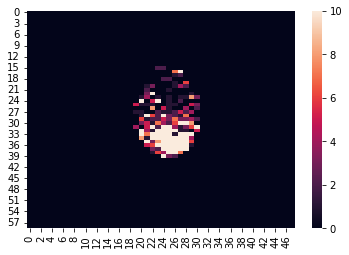

In [50]:
##Generate Heatmap
rows = LondonGridMap.rows
cols = LondonGridMap.columns

x_offset = LondonGridMap.lonOffset
y_offset = LondonGridMap.latOffset

histogram = np.zeros((cols,rows))
for element in coordinates_data:
    x = int(np.ceil((element[0]-LondonGridMap.boundingCoordinates[0])/x_offset))
    y = int(np.ceil((element[1]-LondonGridMap.boundingCoordinates[1])/y_offset))
    histogram[x][y] += 1
       
print(histogram)
sns.heatmap(histogram.T,vmin=0,vmax=10)


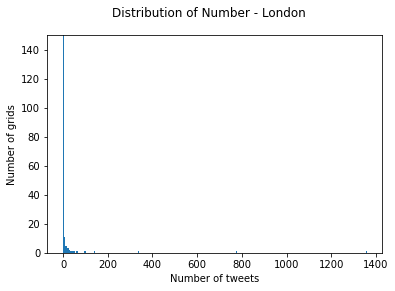

In [51]:
##Distribution
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1,1)

maximum = np.max(histogram)
x = int(cols)
y = int(rows)

bar_chart_distribution = np.zeros(int(maximum)+1)

for i in range(x):
    for j in range(y):
        index = int(histogram[i][j])
        bar_chart_distribution[index] += 1

# print(distribution)
x = np.arange(0,int(maximum) + 1,1)
y = bar_chart_distribution

ax.set_ylim([0,150])
ax.bar(x,y,width=5)

fig.suptitle('Distribution of Number - London')
plt.xlabel('Number of tweets')
plt.ylabel('Number of grids')

plt.show()

In [52]:
# !pip install emoji
# !pip install nltk

In [53]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
import re, emoji
from datetime import datetime
import string
from nltk.corpus import stopwords

MIN_TWEET_LENGTH = 3
MIN_TOKEN_LENGTH = 2    

stop_words = stopwords.words('english')
class Filter():
    # pattern = re.compile('[\W_]+')
    def is_valid_token(token):
        try:     
            return((token not in stop_words) and(token != '&amp;') and (len(token) > MIN_TOKEN_LENGTH) )
        except Exception as e:
            return False

    def is_retweet(text):
        return text.startswith("RT @")

    def strip_emoji(text):
        new_text = re.sub(emoji.get_emoji_regexp(), r"", text)
        return new_text

    def cleanList(text):
        text = Filter.strip_emoji(text)
        text.encode("ascii", errors="ignore").decode()
        return text

    def normalize(token):
        if(token.startswith('#') or token.startswith('@') or token.startswith('$') or token.startswith('https')):
            return token
        if(token.startswith('T&amp')):
            return None
        s = token.lower()

        exclude = set(string.punctuation)
        s = ''.join(ch for ch in s if ch not in exclude)
        
        return s


    def tokenize(text):
        if(text is None):
            return None
        set1 = set()

        try:
            for i in text.split():
                # normalize first
                i = Filter.normalize(i)
                if(i is not None and Filter.is_valid_token(i) == True):
                    set1.add(i)
                    
        except Exception as e:
            print(e)
            print(type(text))
        if(len(set1) > MIN_TWEET_LENGTH):        
            return sorted(set1)
        else:
            return None

    def filterProcess(tweet):
        text = tweet['text']

        # No change 
        x= Filter.tokenize(text)
        
        return x   

In [55]:
hq_file = open('highFileFeb', 'r', encoding='utf-8')
hq_data = []
for line in hq_file.readlines():
    el = json.loads(line)
    hq_data.append(el)
hq_data = pd.DataFrame(list(hq_data))

lq_file = open('lowFileFeb', 'r', encoding='utf-8')
lq_data = []
for line in lq_file.readlines():
    el = json.loads(line)
    lq_data.append(el)
lq_data = pd.DataFrame(list(lq_data))

In [56]:
hq_model = []
lq_model = []
bg_model = []
        
for index,tweet in hq_data.iterrows():
            text = tweet['text']
            text = Filter.filterProcess(tweet)
            if(text is not None):
                for term in text:
                    hq_model.append(term)
        
for index,tweet in lq_data.iterrows():
    text = tweet['text']
    text = Filter.filterProcess(tweet)
    if(text is not None):
        for term in text:
            lq_model.append(term)
        # print(hq_terms_model)
        bg_model = hq_model + lq_model

In [57]:
hq_tf = {}
lq_tf = {}
bg_tf = {}

for term in hq_model:
    if (term in hq_tf):
        hq_tf[term] += 1
    else:
        hq_tf[term] = 1

for term in lq_model:
    if (term in lq_tf):
        lq_tf[term] += 1
    else:
        lq_tf[term] = 1

for term in bg_model:
    if (term in bg_tf):
        bg_tf[term] += 1
    else:
        bg_tf[term] = 1

In [58]:
threshold = 1.6

In [59]:
hq_f = len(hq_model)
lq_f = len(lq_model)
bg_f = len(bg_model)
hq_s = {}
lq_s = {}

for key,value in hq_tf.items():
    tf_term_hq = value
    tf_term_bg = bg_tf.get(key)
    r_term_hq = (tf_term_hq/hq_f)/(tf_term_bg/bg_f)

    if (key not in hq_s):
        hq_s[key] = r_term_hq if r_term_hq > threshold else 0

for key,value in lq_tf.items():
    tf_term_lq = value
    tf_term_bg = bg_tf.get(key)
    r_term_lq = (tf_term_lq/lq_f)/(tf_term_bg/bg_f)

    if (key not in lq_s):
        lq_s[key] = r_term_lq if r_term_lq > threshold else 0

In [60]:
def newsworthyScore(tweet):
    hq_tweet = 0
    lq_tweet = 0
    terms = Filter.filterProcess(tweet)
    if(terms is not None):
        for term in terms:
            if(hq_s.get(term)):           
                hq_tweet += hq_s.get(term)
            if(lq_s.get(term)):
                lq_tweet += lq_s.get(term)
    score = np.log2((1+hq_tweet)/(1+lq_tweet))
    return score

In [61]:
#Initialize the newsworthy score

count = 0
bg_data = pd.concat([hq_data,lq_data])

for index,tweet in bg_data.iterrows():  
    score = newsworthyScore(tweet)
    
    if(score > 0):
        count += 1
print("The number of newsworthy tweets in BG:",count)

The number of newsworthy tweets in BG: 1005


In [62]:
label =[]
for index,tweet in data.iterrows():  
    score = newsworthyScore(tweet)
    
    if(score > 0):
        label.append('high')
    else:
        label.append('low')
#print(label)

In [63]:
data['label'] = label
high_quality= data.loc[data['label'] == 'high']
low_quality= data.loc[data['label'] == 'low']
high_quality

,_id,date,username,text,geoenabled,coordinates,location,place_name,place_country,country_code,place_coordinates,hashtags,mentions,source,label
1,1486425474335076352,{'$date': '2022-01-26T19:47:04Z'},CelebFitnessTV,How to Make Sure Your COVID Test Isn't Fake ht...,True,"{'type': 'Point', 'coordinates': [-0.18016398,...",United Kingdom,"Kensington, London",United Kingdom,GB,"[[[-0.2285894, 51.4772246], [-0.1497908, 51.47...",[],[],dlvr.it,high
3,1486427833899655169,{'$date': '2022-01-26T19:56:26Z'},komabs16,GY413\n#andresrodriguezpose @ The London Schoo...,True,"{'type': 'Point', 'coordinates': [-0.11677892,...","London, England","London, England",United Kingdom,GB,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",[andresrodriguezpose],[],Instagram,high
16,1486436373456433153,{'$date': '2022-01-26T20:30:22Z'},EstasBooths,Magic mirror photo booth hire in Kent and Sout...,True,"{'type': 'Point', 'coordinates': [-0.1094, 51....",Kent,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...","[magicmirror, magicmirrorbooth]",[],Instagram,high
22,1486438809038254080,{'$date': '2022-01-26T20:40:03Z'},StigmabaseO,Big increase in recent PrEP users among new HI...,True,"{'type': 'Point', 'coordinates': [-0.13608912,...",Americas | United Kingdom,"London, England",United Kingdom,GB,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",[],[],dlvr.it,high
23,1486438840881582080,{'$date': '2022-01-26T20:40:11Z'},officiallyemz,Pink to make the boys wink \nWearing blazer a...,True,"{'type': 'Point', 'coordinates': [-0.1094, 51....","London, England","City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],"[Primark, inthestyle, SaffronBarker]",Instagram,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4120,1488775079664107522,{'$date': '2022-02-02T07:23:33Z'},StigmabaseO,Phillip Schofield beams as he and wife Steph e...,True,"{'type': 'Point', 'coordinates': [-0.13608912,...",Americas | United Kingdom,"London, England",United Kingdom,GB,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",[],[],dlvr.it,high
4121,1488775085125038083,{'$date': '2022-02-02T07:23:35Z'},StigmabaseO,Scottish Alba councillor launches 'appalling' ...,True,"{'type': 'Point', 'coordinates': [-0.13608912,...",Americas | United Kingdom,"London, England",United Kingdom,GB,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",[],[],dlvr.it,high
4122,1488775090489597952,{'$date': '2022-02-02T07:23:36Z'},StigmabaseO,"Ben Whishaw says he's sometimes ""critical"" of ...",True,"{'type': 'Point', 'coordinates': [-0.13608912,...",Americas | United Kingdom,"London, England",United Kingdom,GB,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",[],[],dlvr.it,high
4132,1488778569962737673,{'$date': '2022-02-02T07:37:25Z'},soltempore,"Good morning, London! :) #Sunrise 07:37, noon ...",True,"{'type': 'Point', 'coordinates': [-0.1263, 51....",World,"London, England",United Kingdom,GB,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",[Sunrise],[],cipni,high


In [64]:
coordinates_col = high_quality['coordinates']

# Store the final coordinates result
coordinates = []

for element in coordinates_col:
#     print(element['coordinates'])
    coordinates.append(element['coordinates'])

# print(coordinates)

In [65]:
coordinates_data = np.array(coordinates)
# print(coordinates_data[:,0])
#sns.heatmap(coordinates_data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<AxesSubplot:>

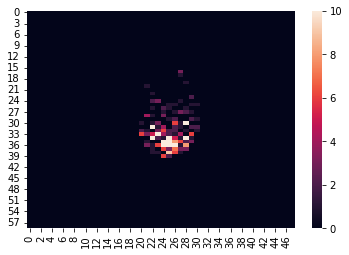

In [66]:
##Generate Heatmap
rows = LondonGridMap.rows
cols = LondonGridMap.columns

x_offset = LondonGridMap.lonOffset
y_offset = LondonGridMap.latOffset

histogram = np.zeros((cols,rows))
for element in coordinates_data:
    x = int(np.ceil((element[0]-LondonGridMap.boundingCoordinates[0])/x_offset))
    y = int(np.ceil((element[1]-LondonGridMap.boundingCoordinates[1])/y_offset))
    histogram[x][y] += 1
       
print(histogram)
sns.heatmap(histogram.T,vmin=0,vmax=10)

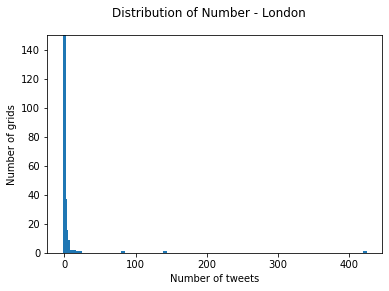

In [67]:
##Distribution
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1,1)

maximum = np.max(histogram)
x = int(cols)
y = int(rows)

bar_chart_distribution = np.zeros(int(maximum)+1)

for i in range(x):
    for j in range(y):
        index = int(histogram[i][j])
        bar_chart_distribution[index] += 1

# print(distribution)
x = np.arange(0,int(maximum) + 1,1)
y = bar_chart_distribution

ax.set_ylim([0,150])
ax.bar(x,y,width=5)

fig.suptitle('Distribution of Number - London')
plt.xlabel('Number of tweets')
plt.ylabel('Number of grids')

plt.show()